In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [5]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3243,Device Help,TOOLS,4.2,28860,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"July 18, 2018",Varies with device,Varies with device
604,Free Cam Girls - Live Webcam,DATING,3.5,35,16M,"1,000+",Free,0,Mature 17+,Dating,"July 16, 2018",2.4,4.0.3 and up
4787,X-ray scanner simulator,FAMILY,2.7,1616,3.0M,"500,000+",Free,0,Everyone,Casual,"January 8, 2017",7.0,2.1 and up
6348,BJJ Roadmap by Stephan Kesting,SPORTS,4.6,969,3.6M,"10,000+",Free,0,Everyone,Sports,"August 21, 2014",1.0,4.0 and up
952,LEGO® TV,ENTERTAINMENT,3.7,17247,7.2M,"1,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"August 4, 2018",4.0.2,5.0 and up


In [9]:
print(f'Количество строк: {data.shape[0]}\nКоличество столбцов: {data.shape[1]}')

Количество строк: 10841
Количество столбцов: 13


In [11]:
print(f'Общее количество пропущенных значений: {data.isnull().sum().sum()}')

Общее количество пропущенных значений: 1487


In [13]:
data2 = data.dropna()

In [15]:
print(f'Общее количество пропущенных значений, после отброшенных нулевых значений: {data2.isnull().sum().sum()}')

Общее количество пропущенных значений, после отброшенных нулевых значений: 0


In [17]:
print(f'Значение рейтинга:\ncамое большое - {data.Rating.max()}\ncамое маленькое - {data.Rating.min()}\nсреднее - {data.Rating.mean()}')

Значение рейтинга:
cамое большое - 19.0
cамое маленькое - 1.0
среднее - 4.193338315362443


In [494]:
data[data.Rating >= 4.9][['App', 'Rating']].head(10)

,App,Rating
55,Tickets SDA 2018 and Exam from the State Traff...,4.9
61,CDL Practice Test 2018 Edition,4.9
64,DMV Permit Practice Test 2018 Edition,4.9
79,Tickets + PDA 2018 Exam,4.9
99,"ipsy: Makeup, Beauty, and Tips",4.9
177,eBoox new: Reader for fb2 epub zip books,4.9
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
618,FREE LIVE TALK,4.9


In [191]:
data3=data.copy()
data3['Installs']=data.Installs.apply(lambda x: ''.join(re.findall(r'\d',x))).replace('','0').astype(int)
data4=data3.sort_values(by='Installs', ascending=False).head(5)
data4['Installs'] = data4.Installs.apply(lambda x: f'{x:,d}+')
data4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


In [121]:
data5=data[['App', 'Category']].groupby(["Category"], as_index=False).count()
data5

,Category,App
0,1.9,1
1,ART_AND_DESIGN,65
2,AUTO_AND_VEHICLES,85
3,BEAUTY,53
4,BOOKS_AND_REFERENCE,231
5,BUSINESS,460
6,COMICS,60
7,COMMUNICATION,387
8,DATING,234
9,EDUCATION,156


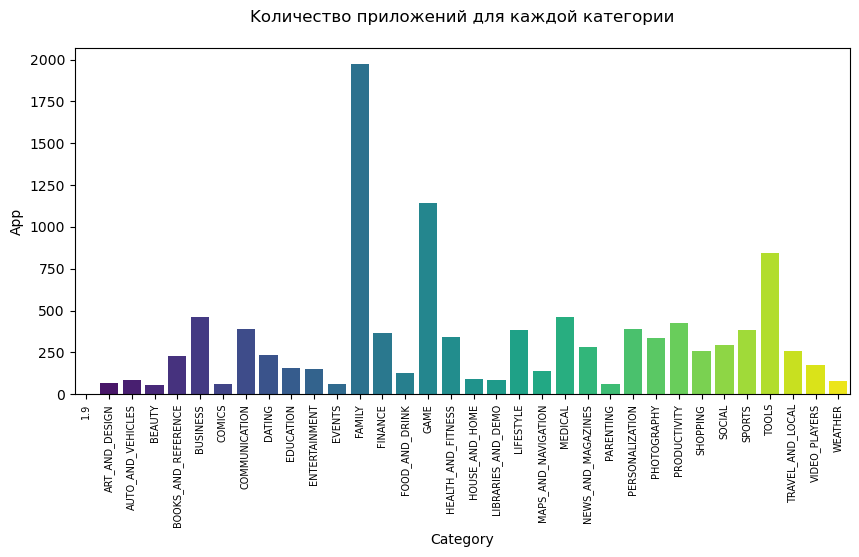

In [181]:
fig, ax = plt.subplots(figsize=(10, 4.5))
ax = sns.barplot(x='Category', y='App', data=data5, hue="Category",
                 errorbar=None, palette="viridis", saturation=2).set(title="Kоличество приложений для каждой категории\n")
plt.xticks(rotation=90, fontsize=7)
plt.show()